# Brief Description

The purpose of this project is to conduct a regression analysis to determine if there is a relationship between rising unemployment and crime in South Africa. There is some exploratory data analysis along the way to see which are the most common crimes, how crime is distributed between the different provinces and among other details.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import squarify
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#viewing crime stats file
df_crime_stats = pd.read_csv('SouthAfricaCrimeStats_v2.csv')
df_crime_stats

,Country,Province,Station,Category,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,South Africa,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,South Africa,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,South Africa,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,South Africa,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,South Africa,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,South Africa,Western Cape,Belhar,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
30857,South Africa,Gauteng,Moffatview,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
30858,South Africa,Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,South Africa,Western Cape,Lentegeur,All theft not mentioned elsewhere,0,0,0,0,0,0,0,0,1300,2346,1989


In [3]:
#viewing popuplation per province file
df_province_population = pd.read_csv('ProvincePopulation.csv')
df_province_population

,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.10
1,Kwazulu/Natal,10267300,94361,108.80
2,Mpumalanga,4039939,76495,52.80
3,Western Cape,5822734,129462,45.00
4,Limpopo,5404868,125755,43.00
5,Eastern Cape,6562053,168966,38.80
6,North West,3509953,104882,33.50
7,Free State,2745590,129825,21.10
8,Northern Cape,1145861,372889,3.10


In [4]:
#viewing unemployment stats file
df_uneployment_stats_countries = pd.read_csv('API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_2593097.csv')
df_uneployment_stats_countries

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.73,6.58,6.48,6.41,6.47,6.55,6.52,6.41,6.47,6.81
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.51,11.52,11.54,11.45,11.39,11.31,11.18,11.06,10.98,11.73
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.47,4.56,4.36,4.64,4.55,5.49,5.93,5.91,5.93,6.30
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.36,7.37,7.38,7.31,7.26,7.20,7.10,7.00,6.93,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.08,13.24,13.41,13.47,13.40,13.31,13.15,13.01,12.90,13.42
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.64,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,28.74
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.34,7.85,8.61,9.34,10.10,10.88,11.63,12.01,11.91,12.17


# DATA CLEANING

# Data cleaning of unemployment data

In [5]:
#Data cleaning of the 'df_unemployment_stats_countries' dataframe to extra South Africa Unemployment Statistics
df_uneployment_stats_countries.iloc[263]


Country Name                                           South Africa
Country Code                                                    ZAF
Indicator Name    Unemployment, total (% of total labor force) (...
Indicator Code                                       SL.UEM.TOTL.ZS
1960                                                            NaN
                                        ...                        
2016                                                          26.54
2017                                                          27.04
2018                                                          26.91
2019                                                          28.47
2020                                                          28.74
Name: 263, Length: 65, dtype: object

In [6]:
#Data cleaning of the 'df_uneployment_stats_countries' dataframe to extra South Africa Unemployment Statistics
df_south_africa_unemployment = pd.DataFrame(df_uneployment_stats_countries.iloc[263])
df_south_africa_unemployment

,263
Country Name,South Africa
Country Code,ZAF
Indicator Name,"Unemployment, total (% of total labor force) (..."
Indicator Code,SL.UEM.TOTL.ZS
1960,NaN
...,...
2016,26.54
2017,27.04
2018,26.91
2019,28.47


In [7]:
#Slicing the data startfrom 2006 to 2016
df_south_africa_unemployment = df_south_africa_unemployment.loc['2006':'2016']
df_south_africa_unemployment

,263
2006,28.34
2007,26.54
2008,22.41
2009,23.52
2010,24.68
2011,24.64
2012,24.73
2013,24.56
2014,24.89
2015,25.15


In [8]:
#Fixing the aesthetics of the DataFrame by putting proper column heads
df_south_africa_unemployment_final = df_south_africa_unemployment.rename(columns={263 : 'Unemployment Rate'})
df_south_africa_unemployment_final.index.name = 'Year'
df_south_africa_unemployment_final

,Unemployment Rate
Year,
2006,28.34
2007,26.54
2008,22.41
2009,23.52
2010,24.68
2011,24.64
2012,24.73
2013,24.56
2014,24.89


# Data cleaning of crime data

In [9]:
#Renaming the Year columns of crime stats to match unemployment DataFrame
df_crime_stats_final = df_crime_stats.rename(columns={'2005-2006':2006, '2006-2007':2007, '2007-2008':2008,
                                                      '2008-2009':2009, '2009-2010':2010, '2010-2011':2011,
                                                      '2011-2012':2012, '2012-2013':2013, '2013-2014':2014,
                                                      '2014-2015':2015, '2015-2016':2016})
df_crime_stats_final

,Country,Province,Station,Category,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,South Africa,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,South Africa,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,South Africa,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,South Africa,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,South Africa,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,South Africa,Western Cape,Belhar,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
30857,South Africa,Gauteng,Moffatview,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
30858,South Africa,Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,South Africa,Western Cape,Lentegeur,All theft not mentioned elsewhere,0,0,0,0,0,0,0,0,1300,2346,1989


In [10]:
#Deleting unnecessary columns
df_crime_stats_final2 = df_crime_stats_final.drop(['Country', 'Station', 'Category'], axis = 1)
df_crime_stats_final2

,Province,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Western Cape,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
...,...,...,...,...,...,...,...,...,...,...,...,...
30856,Western Cape,0,0,250,837,710,746,839,762,882,1015,829
30857,Gauteng,0,0,0,0,0,0,0,1012,1195,1294,991
30858,Western Cape,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,Western Cape,0,0,0,0,0,0,0,0,1300,2346,1989


In [11]:
#Grouping crime stats by Province
df_crime_stats_grouped_prov = df_crime_stats_final2.groupby('Province').sum()
df_crime_stats_grouped_prov

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Province,,,,,,,,,,,
Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


In [12]:
df_crime_stats_final_2 = df_crime_stats_final.drop(['Country', 'Station'], axis = 1)
df_crime_stats_final_2


,Province,Category,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Western Cape,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,Western Cape,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
30857,Gauteng,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
30858,Western Cape,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,Western Cape,All theft not mentioned elsewhere,0,0,0,0,0,0,0,0,1300,2346,1989


In [13]:
pd.set_option("display.max_rows", None)
df_crime_stats_grouped_prov_category = df_crime_stats_final_2.groupby(['Province', 'Category']).sum()
df_crime_stats_grouped_prov_category

2006  \
Province      Category                                                     
Eastern Cape  All theft not mentioned elsewhere                    40001   
              Arson                                                 1281   
              Assault with the intent to inflict grievous bod...   37196   
              Attempted murder                                      2508   
              Bank robbery                                             2   
              Burglary at non-residential premises                  6015   
              Burglary at residential premises                     32978   
              Carjacking                                             518   
              Commercial crime                                      4320   
              Common assault                                       22509   
              Common robbery                                        8135   
              Driving under the influence of alcohol or drugs       3839   
              Drug-related crime                                    6991   
              Illegal possession of firearms and ammunition         1506   
              Malicious damage to property                         14681   
              Murder                                                3653   
              Robbery at non-residential premises                    231   
              Robbery at residential premises                        619   
              Robbery of cash in transit                              26   
              Robbery with aggravating circumstances                9164   
              Sexual Offences                                      10215   
              Sexual offences as result of police action               0   
              Shoplifting                                           6902   
              Stock-theft                                           7250   
              Theft of motor vehicle and motorcycle                 5479   
              Theft out of or from motor vehicle                   12894   
              Truck hijacking                                         64   
Free State    All theft not mentioned elsewhere                    26602   
              Arson                                                  396   
              Assault with the intent to inflict grievous bod...   16796   
              Attempted murder                                      1032   
              Bank robbery                                             1   
              Burglary at non-residential premises                  4087   
              Burglary at residential premises                     17353   
              Carjacking                                              92   
              Commercial crime                                      2229   
              Common assault                                       22179   
              Common robbery                                        4039   
              Driving under the influence of alcohol or drugs       1320   
              Drug-related crime                                    5002   
              Illegal possession of firearms and ammunition          376   
              Malicious damage to property                         10021   
              Murder                                                 860   
              Robbery at non-residential premises                     23   
              Robbery at residential premises                        111   
              Robbery of cash in transit                               1   
              Robbery with aggravating circumstances                4137   
              Sexual Offences                                       4481   
              Sexual offences as result of police action               0   
              Shoplifting                                           3271   
              Stock-theft                                           3970   
              Theft of motor vehicle and

In [14]:
#Calculating Average across the years then transposing the dataFrame
df_crime_stats_sum_per_yr = df_crime_stats_grouped_prov.sum(axis = 0)
df_crime_stats_sum_per_yr

2006    2176557
2007    2138717
2008    2072449
2009    2121884
2010    2145388
2011    2091348
2012    2106560
2013    2151032
2014    2204000
2015    2206506
2016    2182999
dtype: int64

In [15]:
type(df_crime_stats_sum_per_yr)

pandas.core.series.Series

In [16]:
#Converting final aggregated out to a DataFrame
df_crime_stats_final_summed = pd.DataFrame(df_crime_stats_sum_per_yr)

df_crime_stats_final_summed = df_crime_stats_final_summed.rename(columns={0 : 'Recorded Crimes'})
df_crime_stats_final_summed.index.name = 'Year'

df_crime_stats_final_summed

,Recorded Crimes
Year,
2006,2176557
2007,2138717
2008,2072449
2009,2121884
2010,2145388
2011,2091348
2012,2106560
2013,2151032
2014,2204000


In [17]:
#Merging the crime and unemployment data frames
df_crime_unemployment = pd.merge(left = df_crime_stats_final_summed, 
                                 right = df_south_africa_unemployment_final,
                                left_on = 'Year',
                                right_on = 'Year')

df_crime_unemployment

,Recorded Crimes,Unemployment Rate
Year,,
2006,2176557,28.34
2007,2138717,26.54
2008,2072449,22.41
2009,2121884,23.52
2010,2145388,24.68
2011,2091348,24.64
2012,2106560,24.73
2013,2151032,24.56
2014,2204000,24.89


In [18]:
#Converting the Unemploment Rate colomn to an integer for easier development of visualisation
df_crime_unemployment['Unemployment Rate'] = df_crime_unemployment['Unemployment Rate'].astype(int)
df_crime_unemployment

,Recorded Crimes,Unemployment Rate
Year,,
2006,2176557,28
2007,2138717,26
2008,2072449,22
2009,2121884,23
2010,2145388,24
2011,2091348,24
2012,2106560,24
2013,2151032,24
2014,2204000,24


In [19]:
#Summary statistics
df_crime_unemployment.describe()

,Recorded Crimes,Unemployment Rate
count,11.00,11.00
mean,"2,145,221.82",24.55
std,"44,646.83",1.63
min,"2,072,449.00",22.00
25%,"2,114,222.00",24.00
50%,"2,145,388.00",24.00
75%,"2,179,778.00",25.50
max,"2,206,506.00",28.00


# Visualisations

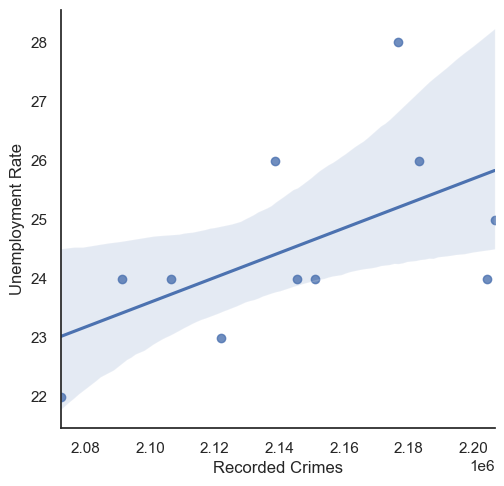

<Figure size 2000x1500 with 0 Axes>

In [20]:
#a regression plot of Unemeployment vs
sns.lmplot(x = 'Recorded Crimes', y = 'Unemployment Rate', data = df_crime_unemployment)
plt.figure(figsize = (20,15))
plt.show()

From the scatter plot above there is a visible positive correlation between unemployment and crime

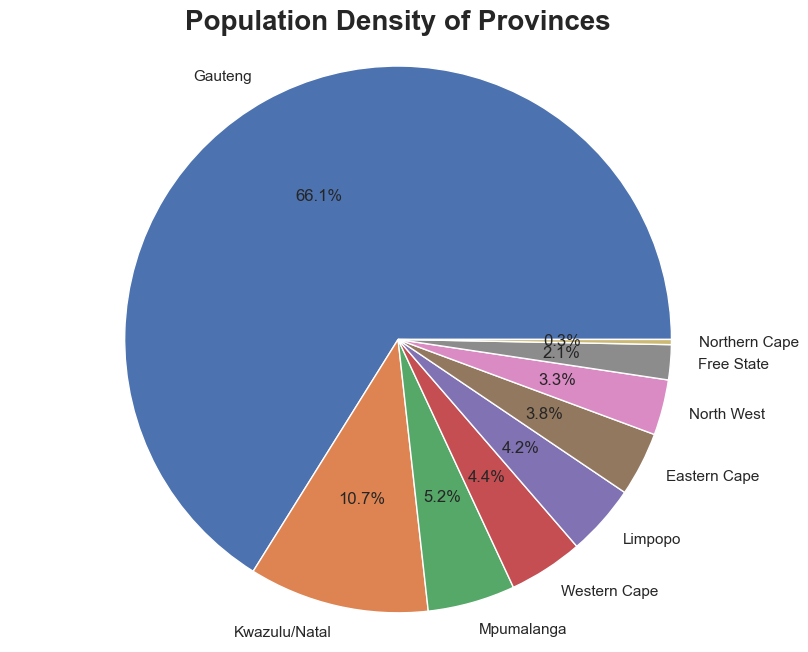

In [21]:
#A pie chart to show the population density of each province
plt.pie(df_province_population['Density'],labels = df_province_population['Province'],autopct='%1.1f%%')
plt.title('Population Density of Provinces', fontweight='bold', fontsize=20)
plt.axis('equal')
plt.show()

In [22]:
df_crime_province_2006_2016 = pd.DataFrame(df_crime_stats_grouped_prov.sum(axis=1))
df_crime_province_2006_2016 = df_crime_province_2006_2016.rename(columns={0 : 'Recorded Crimes'})
df_crime_province_2006_2016.index.name = 'Province'
df_crime_province_2006_2016

,Recorded Crimes
Province,
Eastern Cape,2370079
Free State,1397044
Gauteng,6855654
Kwazulu/Natal,3808898
Limpopo,1201185
Mpumalanga,1370933
North West,1255258
Northern Cape,546262
Western Cape,4792127


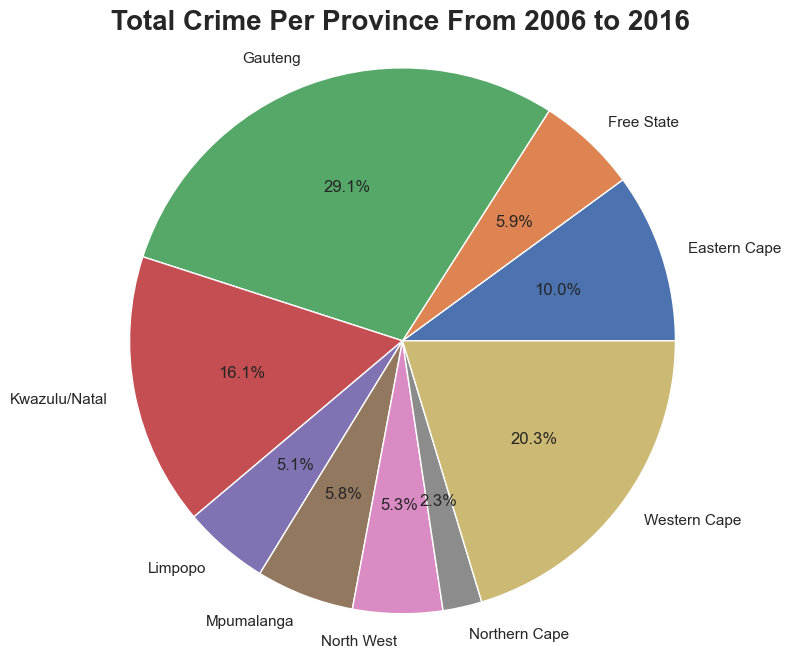

In [23]:
#A pie chart to visualise the total crime from 2006 to 2016 for each province
plt.pie(df_crime_province_2006_2016['Recorded Crimes'], labels = df_crime_province_2006_2016.index ,autopct='%1.1f%%')
plt.title('Total Crime Per Province From 2006 to 2016', fontweight='bold', fontsize=20)
plt.axis('equal')
plt.show()

From the pie chart it looks like Gautang, Western Cape and Kwazulu Natal have the highest share of the crimes respectively over the 10 years.

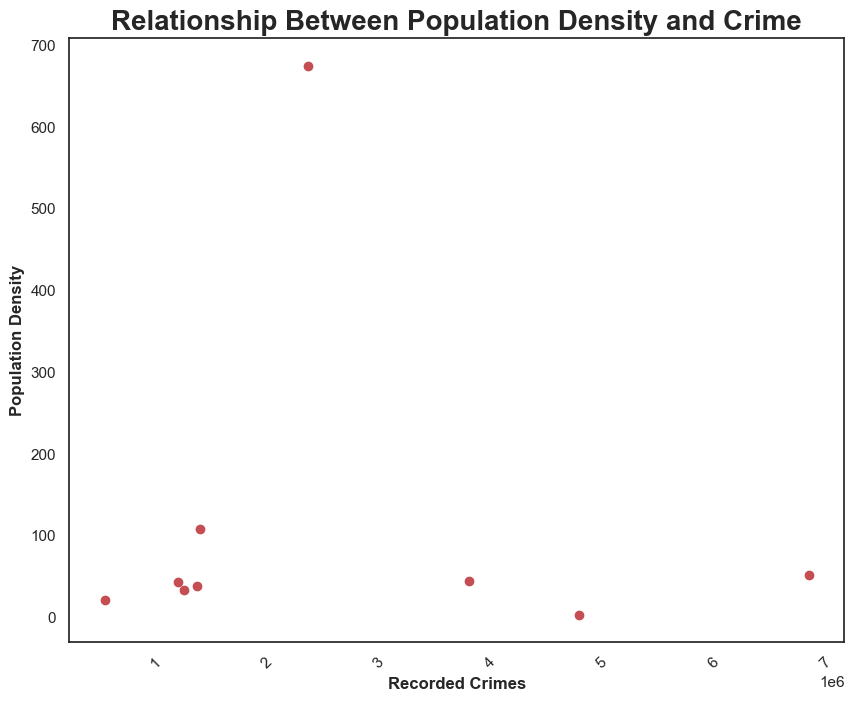

In [24]:
#Scatter of population density vs crime
df_province_population['Density'] = df_province_population['Density'].astype(int)

plt.scatter(x = df_crime_province_2006_2016['Recorded Crimes'],
            y = df_province_population['Density'],
            color = 'r')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Relationship Between Population Density and Crime', fontweight='bold', fontsize=20)
plt.xlabel('Recorded Crimes', fontweight = 'bold')
plt.ylabel('Population Density', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

From the scatter plot it can be seen that there is no visible correlation between population density and crime 

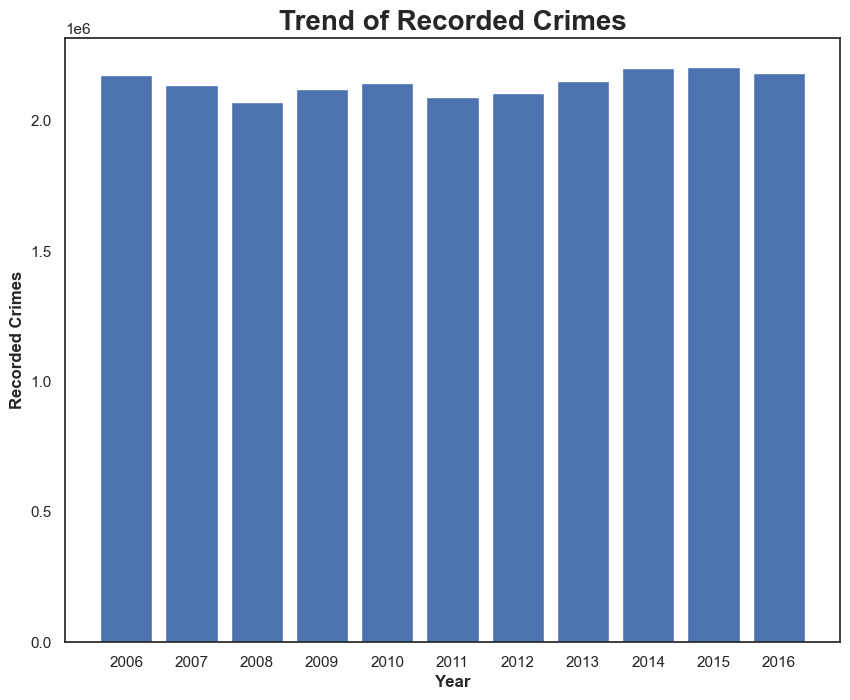

In [51]:
#A bar chart to display the trend of crime between 2006 and 2016
plt.bar(df_crime_unemployment.index, df_crime_unemployment['Recorded Crimes'])
plt.title('Trend of Recorded Crimes', fontweight='bold', fontsize=20)
plt.ylabel('Recorded Crimes', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.show()

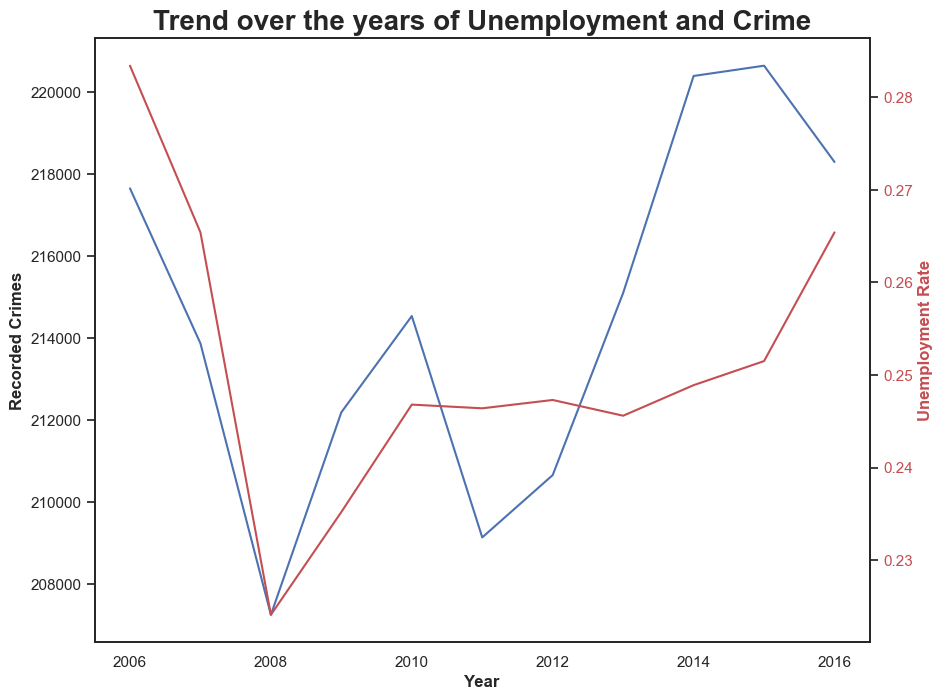

In [46]:
#construsting a line graph with a secondary axis so as to show the general trend of crime and unemployment on one chart
X_year = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(X_year, df_crime_stats_final_summed['Recorded Crimes']/10)
ax1.set_ylabel('Recorded Crimes', fontweight='bold')
ax1.set_xlabel('Year', fontweight = 'bold')

ax2 = ax1.twinx()
ax2.plot(X_year, df_south_africa_unemployment_final['Unemployment Rate']/100, 'r-')
ax2.set_ylabel('Unemployment Rate', color='r', fontweight = 'bold')
plt.title('Trend over the years of Unemployment and Crime', fontweight='bold', fontsize=20)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

From the line graph it can be seen that generally crime and unemployment are generally moving in the same direction, this is more visible from 2006 to 2008. However from 2008 onwards the directional movement is not as closely related.

In [27]:
df_crime_stats_final_4 = df_crime_stats_final.drop(['Country', 'Station'], axis = 1)

df_crime_stats_grouped_category = df_crime_stats_final_4.groupby('Category').sum()
df_crime_stats_grouped_category

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Category,,,,,,,,,,,
All theft not mentioned elsewhere,424690,407714,387554,386858,360120,361222,370916,356847,363517,360541,340372
Arson,7247,7438,6948,6445,6304,6157,5996,5665,5458,5127,4903
Assault with the intent to inflict grievous bodily harm,225659,216754,208705,202328,203807,197470,191612,185050,182333,182556,182933
Attempted murder,20369,19957,18643,18140,17247,15360,14730,16236,16989,17537,18127
Bank robbery,59,130,146,89,81,46,29,4,21,17,6
Burglary at non-residential premises,54217,58240,62756,69829,71544,68907,69902,73492,73464,74358,75008
Burglary at residential premises,261403,248462,236638,245465,255278,246612,244667,261319,259784,253716,250606
Carjacking,12783,13534,14152,14856,13852,10541,9417,9931,11180,12773,14602
Commercial crime,51911,59637,63233,75166,82414,85646,85570,89138,76744,67830,69917


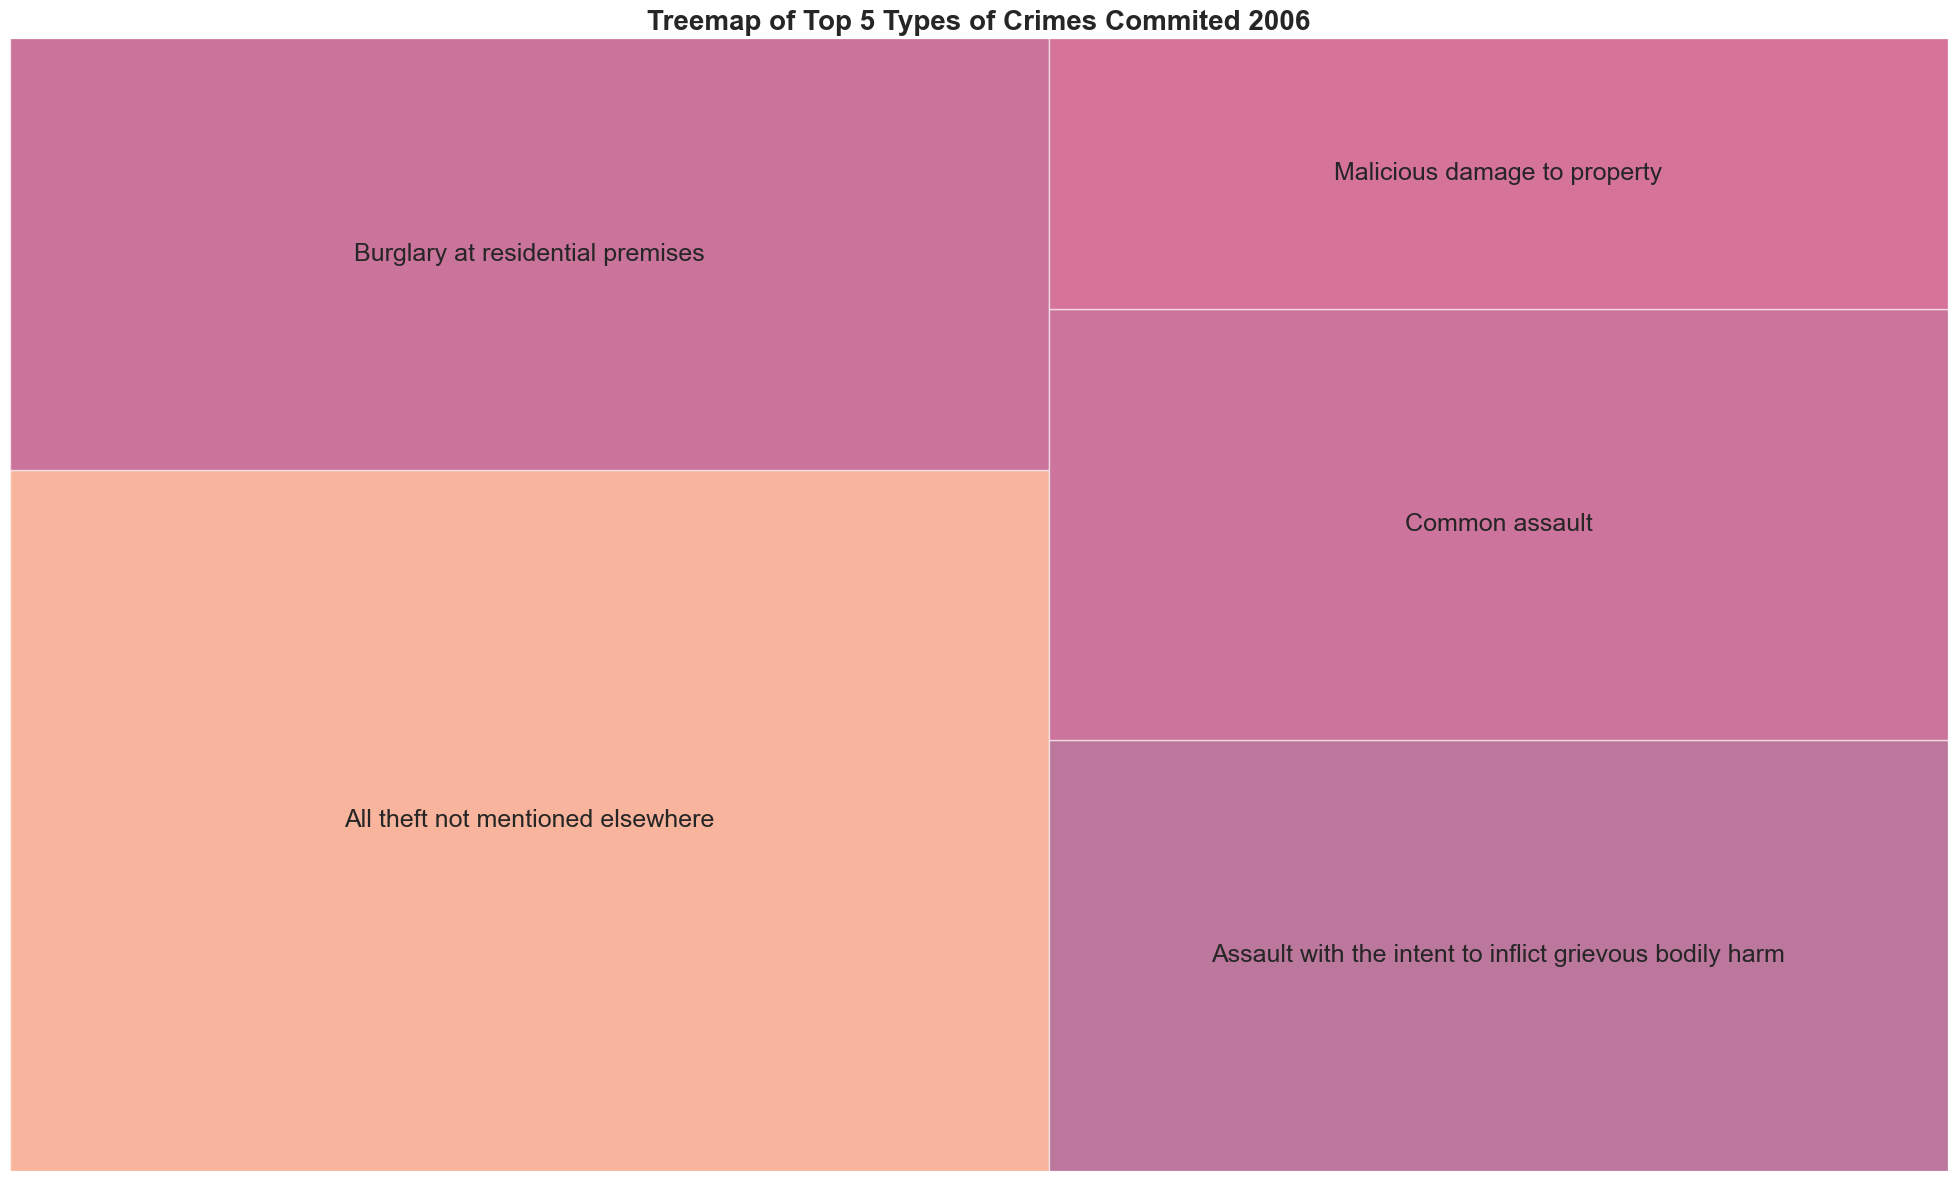

In [28]:
df = df_crime_stats_grouped_category.drop('Sexual offences as result of police action', axis = 0)

df_2006 = pd.DataFrame(df['2006']).sort_values('2006', ascending = False)
df_2006 = df_2006[:5]
category_list_2006 = list(df_2006.index)
yr_2006 = list(df_2006['2006'])

df_2007 = pd.DataFrame(df['2007']).sort_values('2007', ascending = False)
df_2007 = df_2007[:5]
category_list_2007 = list(df_2007.index)
yr_2007 = list(df_2007['2007'])

df_2008 = pd.DataFrame(df['2008']).sort_values('2008', ascending = False)
df_2008 = df_2008[:5]
category_list_2008 = list(df_2008.index)
yr_2008 = list(df_2008['2008'])

df_2009 = pd.DataFrame(df['2009']).sort_values('2009', ascending = False)
df_2009 = df_2009[:5]
category_list_2009 = list(df_2009.index)
yr_2009 = list(df_2009['2009'])

df_2010 = pd.DataFrame(df['2010']).sort_values('2010', ascending = False)
df_2010 = df_2010[:5]
category_list_2010 = list(df_2010.index)
yr_2010 = list(df_2010['2010'])

df_2011 = pd.DataFrame(df['2011']).sort_values('2011', ascending = False)
df_2011 = df_2011[:5]
category_list_2011 = list(df_2011.index)
yr_2011 = list(df_2011['2011'])

df_2012 = pd.DataFrame(df['2012']).sort_values('2012', ascending = False)
df_2012 = df_2012[:5]
category_list_2012 = list(df_2012.index)
yr_2012 = list(df_2012['2012'])

df_2013 = pd.DataFrame(df['2013']).sort_values('2013', ascending = False)
df_2013 = df_2013[:5]
category_list_2013 = list(df_2013.index)
yr_2013 = list(df_2013['2013'])

df_2014 = pd.DataFrame(df['2014']).sort_values('2014', ascending = False)
df_2014 = df_2014[:5]
category_list_2014 = list(df_2014.index)
yr_2014 = list(df_2014['2014'])

df_2015 = pd.DataFrame(df['2015']).sort_values('2015', ascending = False)
df_2015 = df_2015[:5]
category_list_2015 = list(df_2015.index)
yr_2015 = list(df_2015['2015'])

df_2016 = pd.DataFrame(df['2016']).sort_values('2016', ascending = False)
df_2016 = df_2016[:5]
category_list_2016 = list(df_2016.index)
yr_2016 = list(df_2016['2016'])



#creating function for reuse
def tree_map_for_crimes(size, label, title):
    plt.figure(figsize = (25,15))
    squarify.plot(sizes = size, label = label, pad = False, bar_kwargs={'alpha':.6}, text_kwargs={'fontsize':18})
    plt.title(label = title, fontweight ='bold', fontsize = 20)
    plt.axis('off');
    
tree_map_for_crimes(yr_2006, category_list_2006, 'Treemap of Top 5 Types of Crimes Commited 2006')

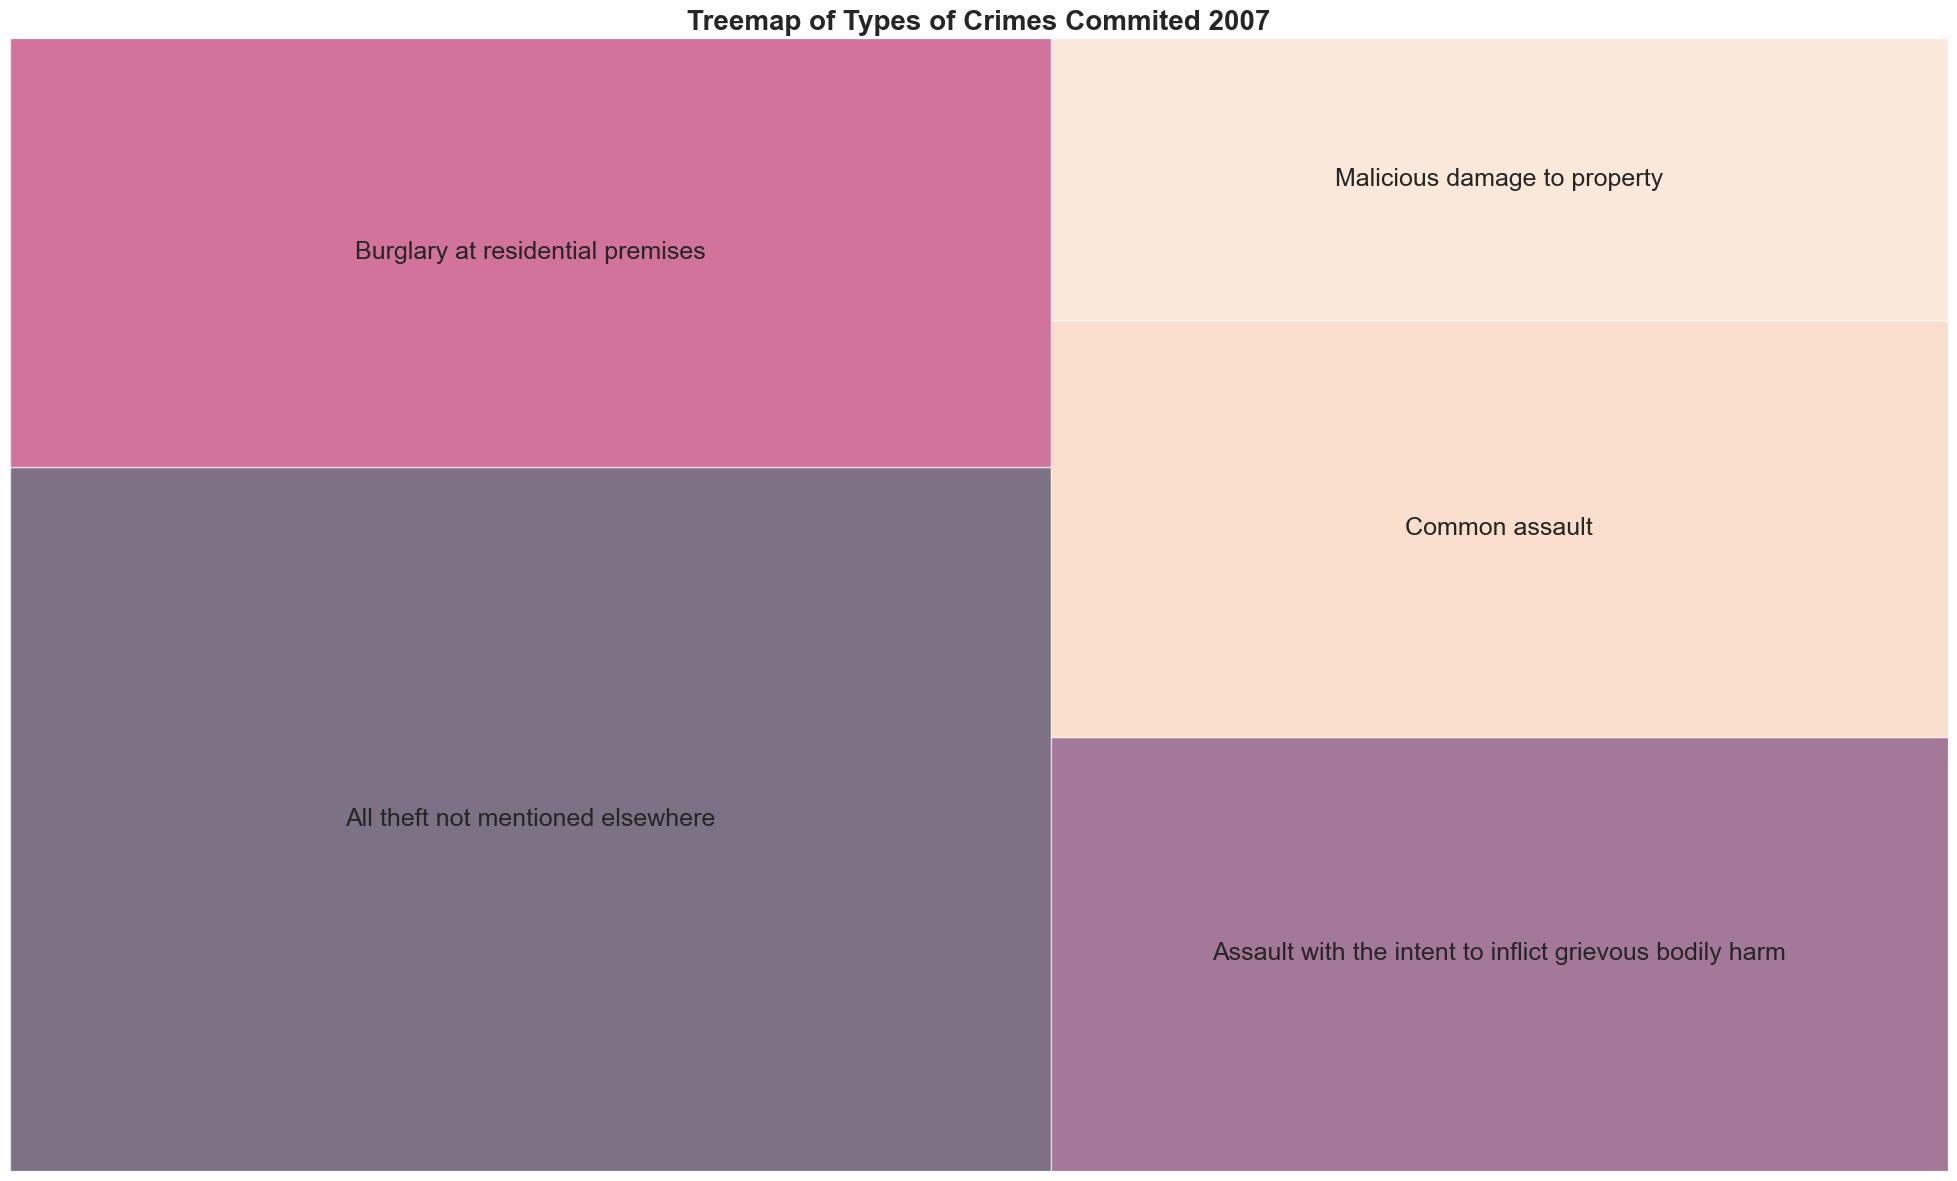

In [29]:
tree_map_for_crimes(yr_2007, category_list_2007, 'Treemap of Types of Crimes Commited 2007')

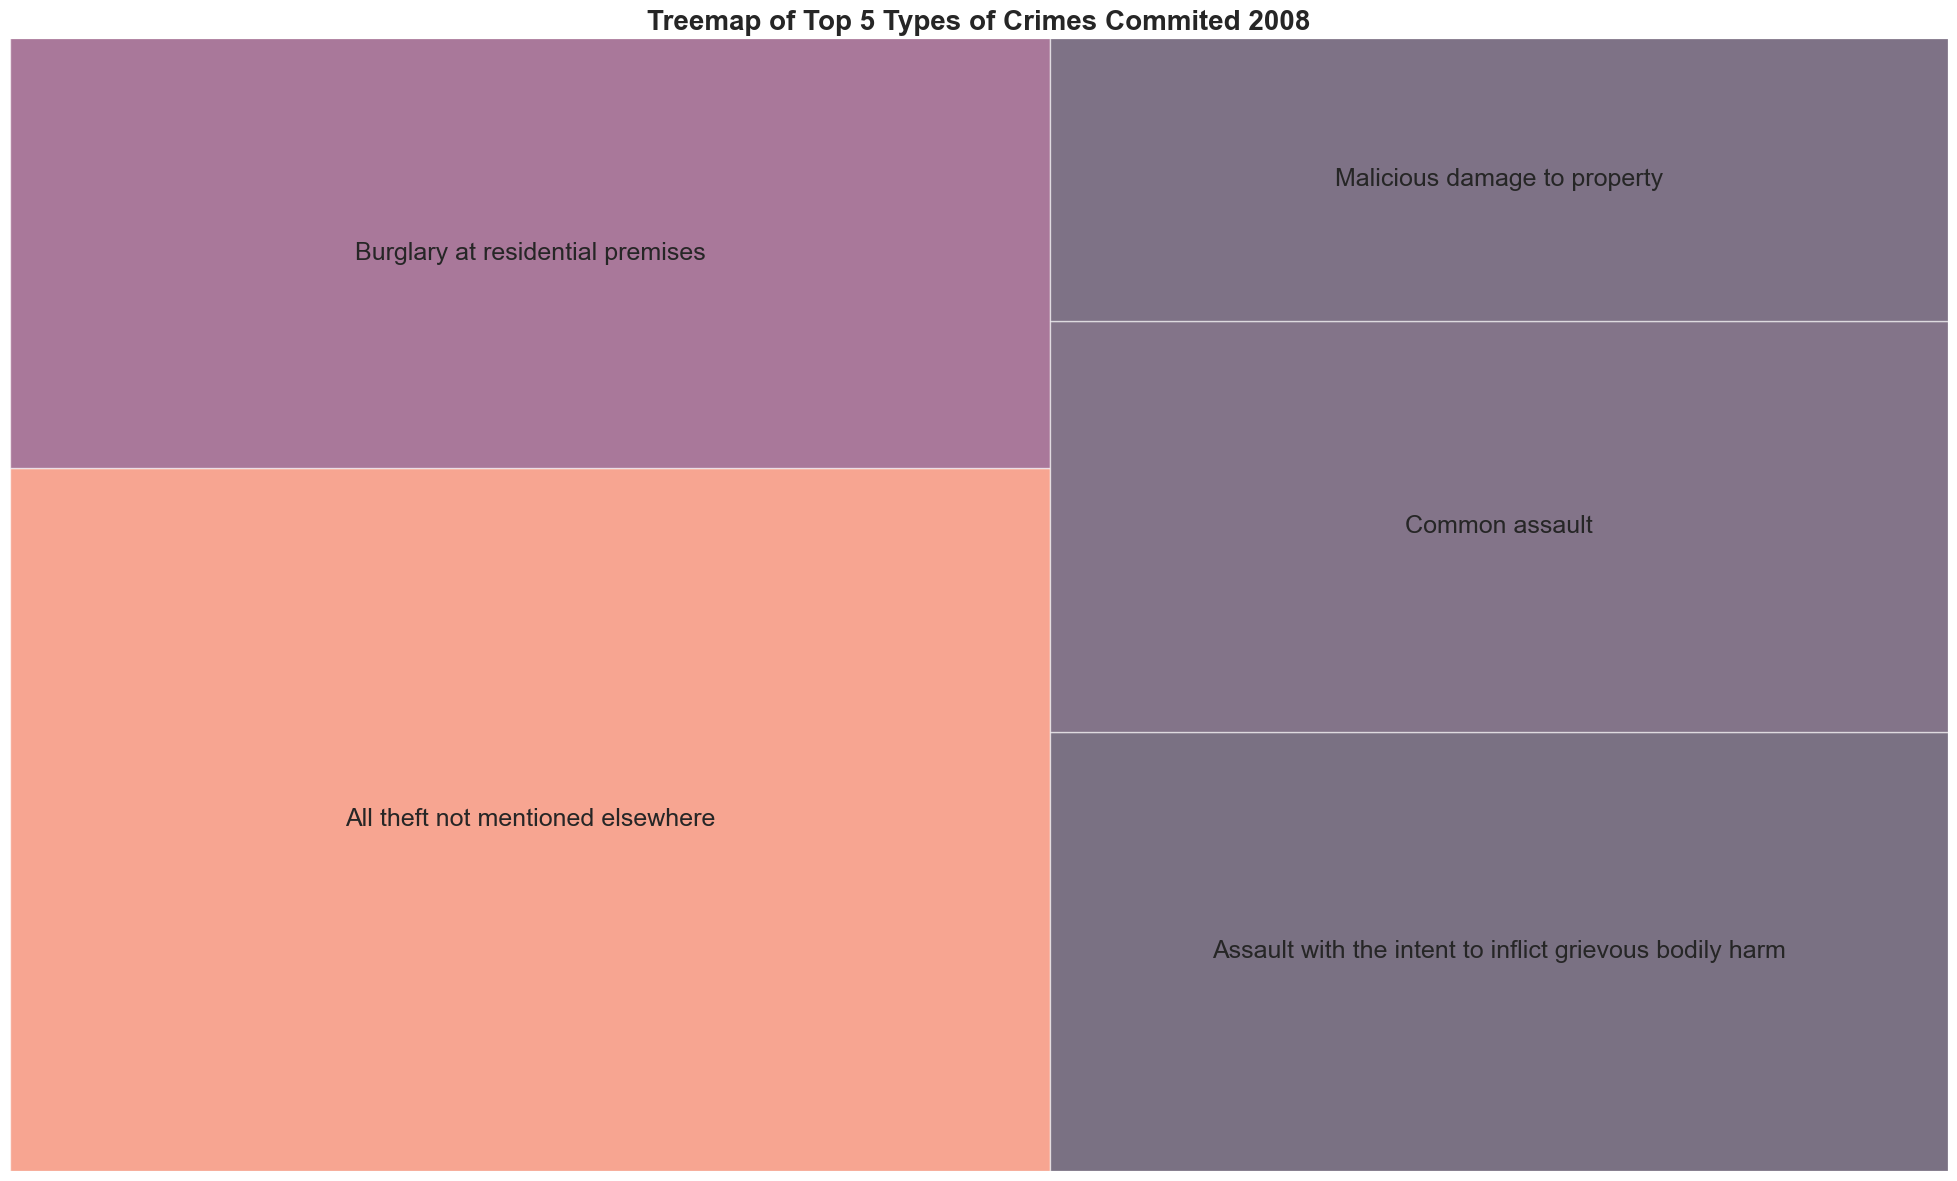

In [30]:
tree_map_for_crimes(yr_2008, category_list_2008, 'Treemap of Top 5 Types of Crimes Commited 2008')

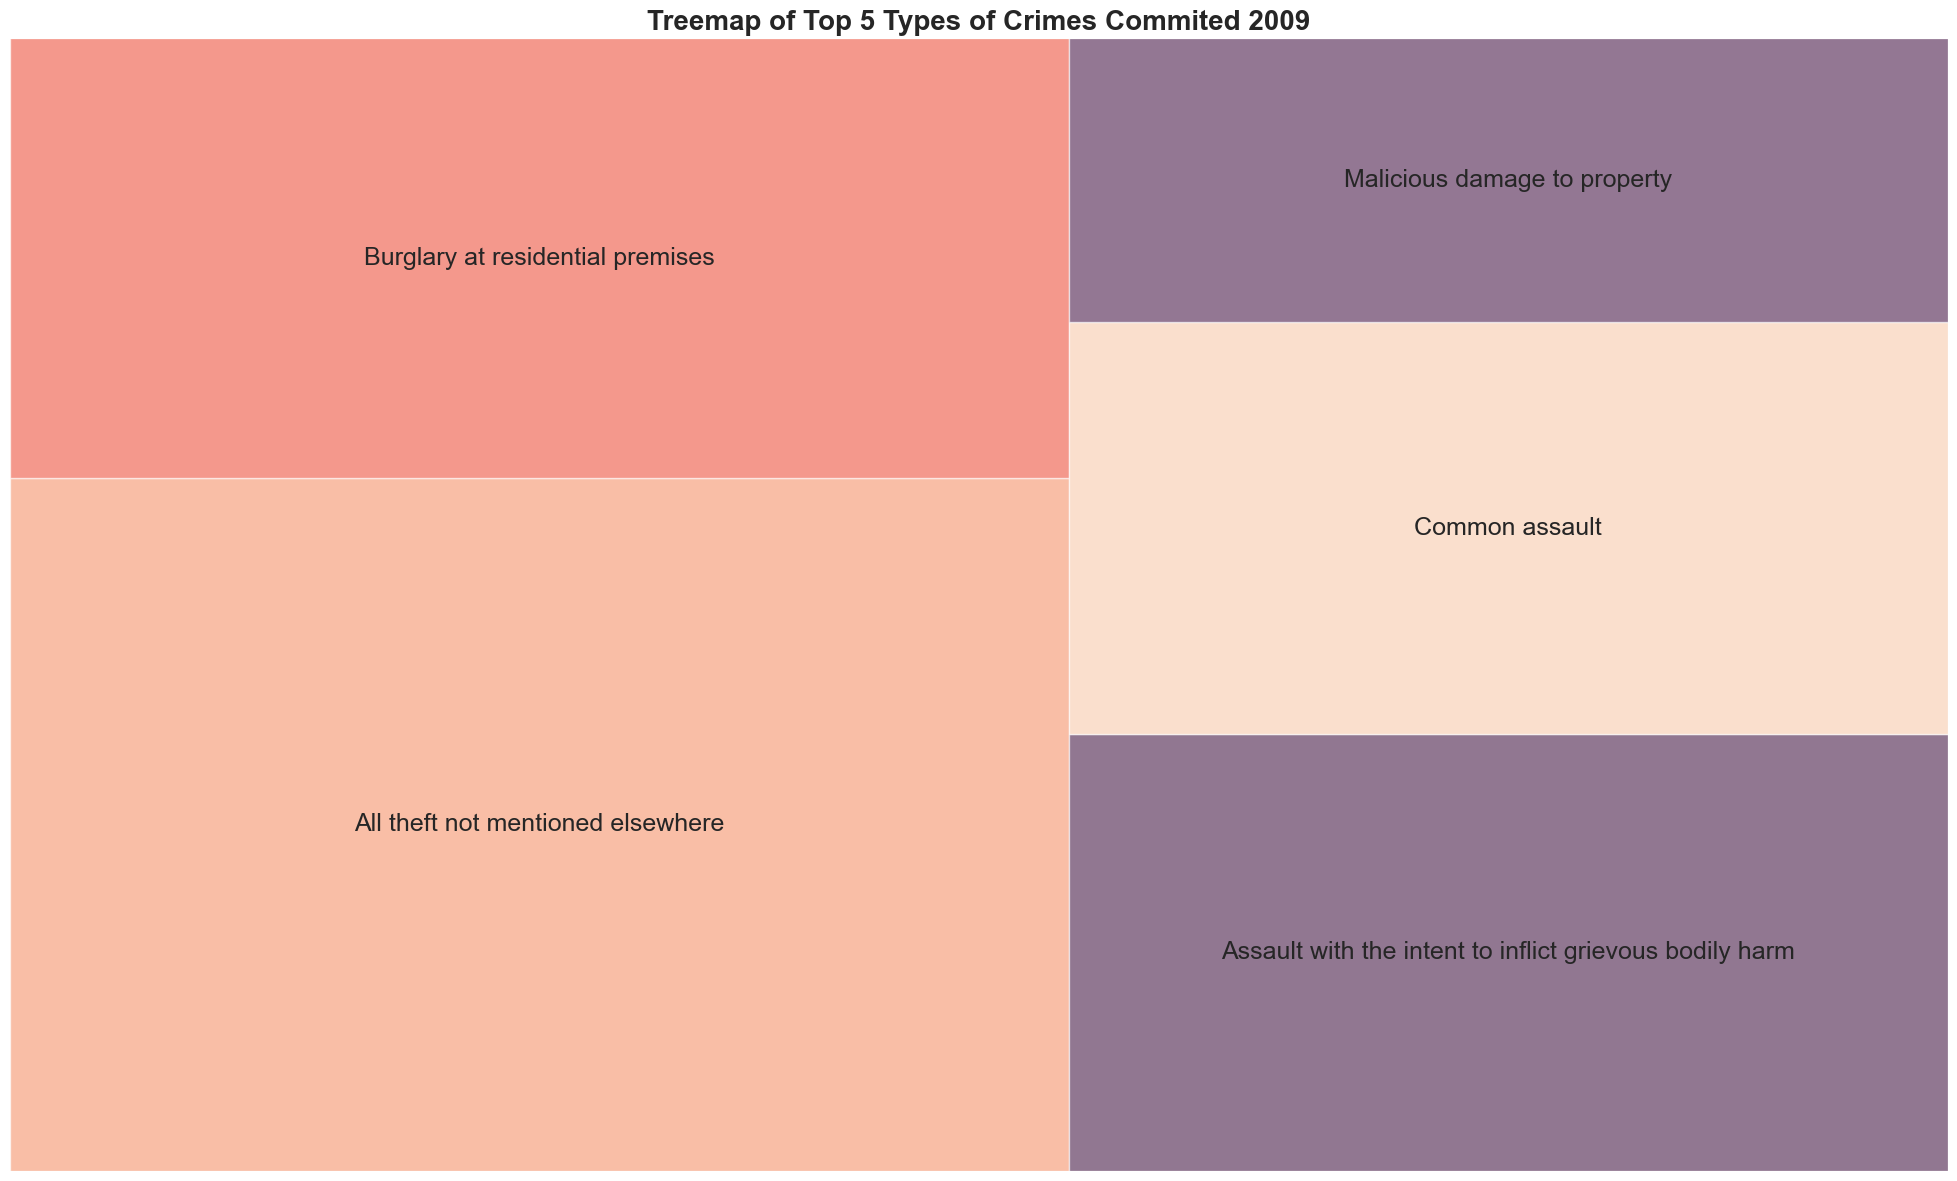

In [31]:
tree_map_for_crimes(yr_2009, category_list_2009, 'Treemap of Top 5 Types of Crimes Commited 2009')

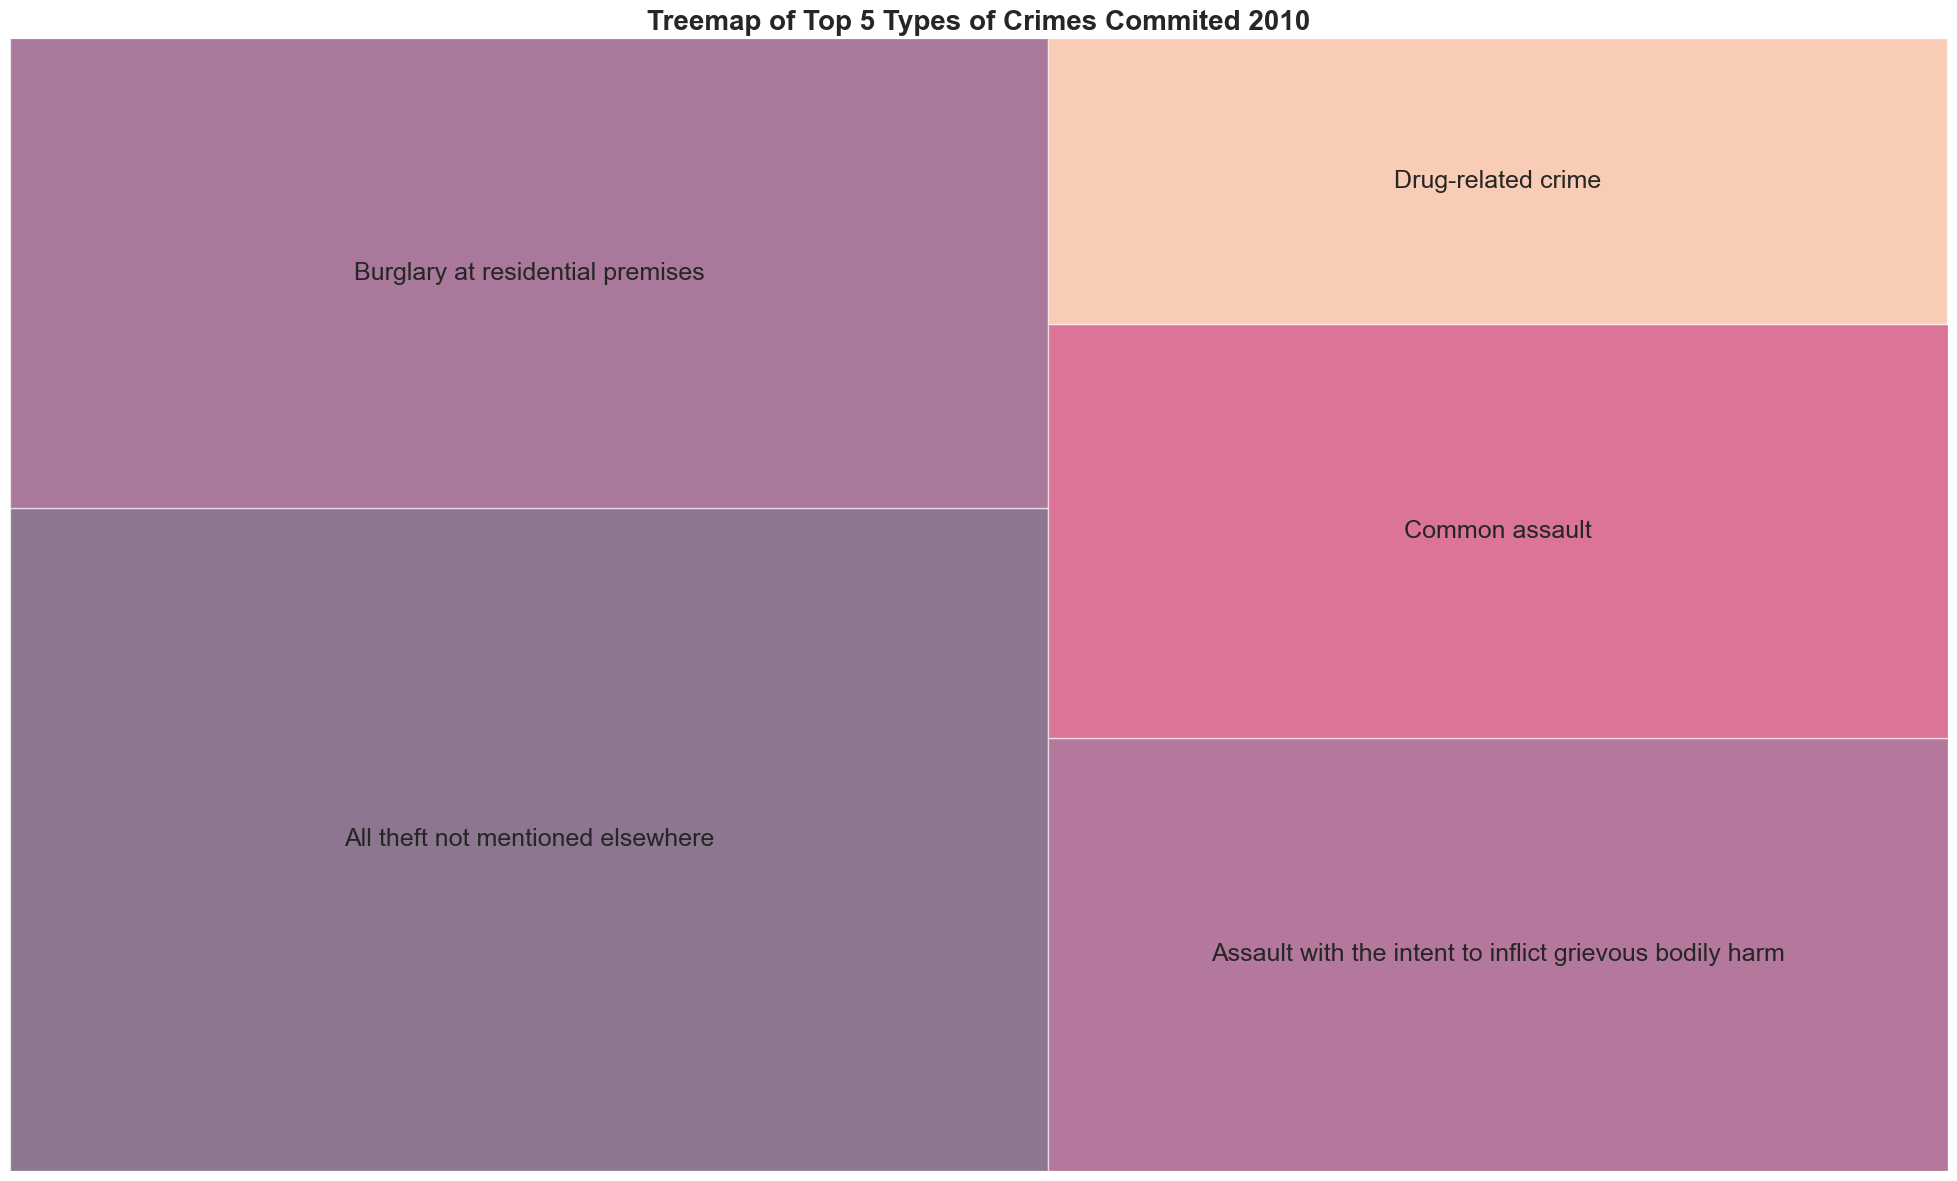

In [32]:
tree_map_for_crimes(yr_2010, category_list_2010, 'Treemap of Top 5 Types of Crimes Commited 2010')

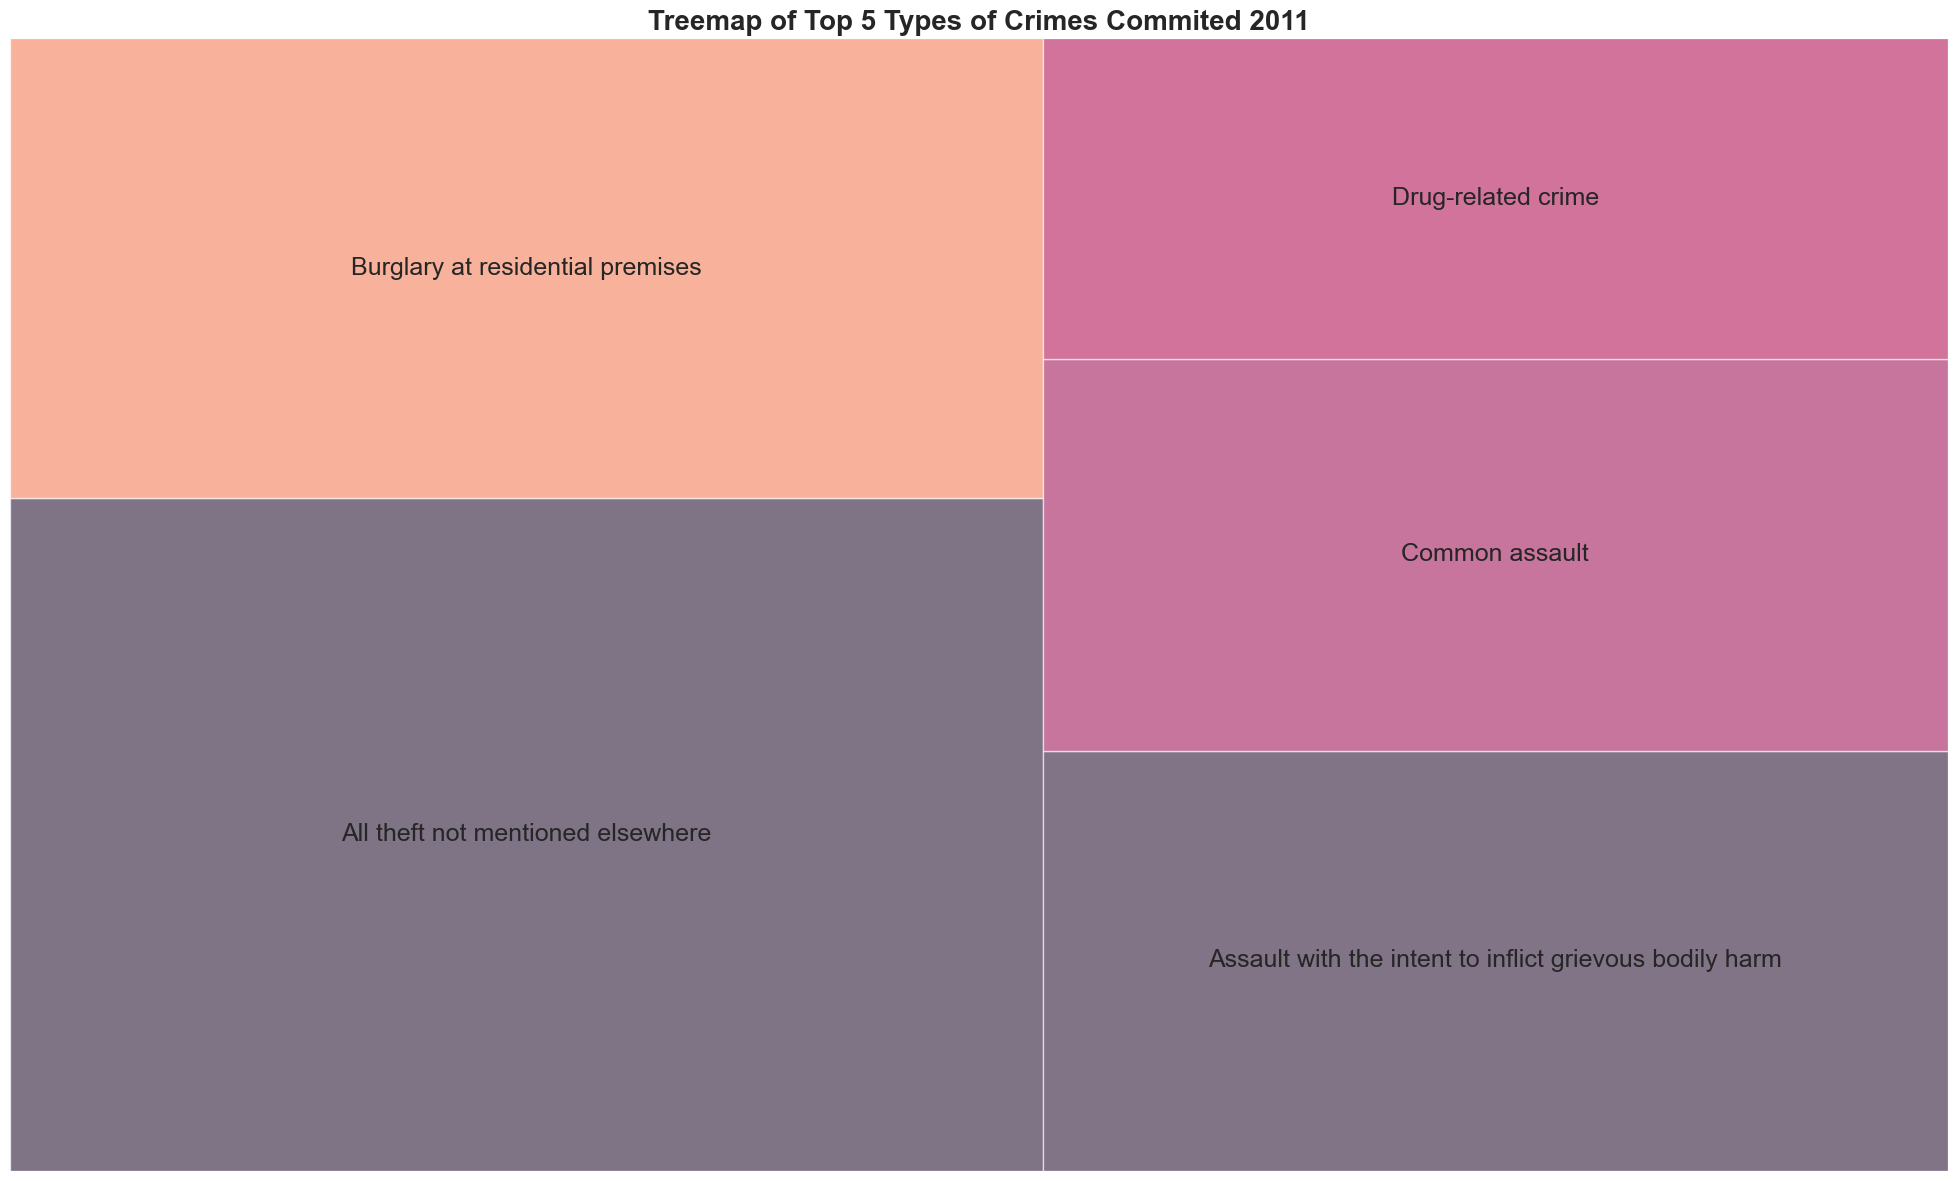

In [33]:
tree_map_for_crimes(yr_2011, category_list_2011, 'Treemap of Top 5 Types of Crimes Commited 2011')

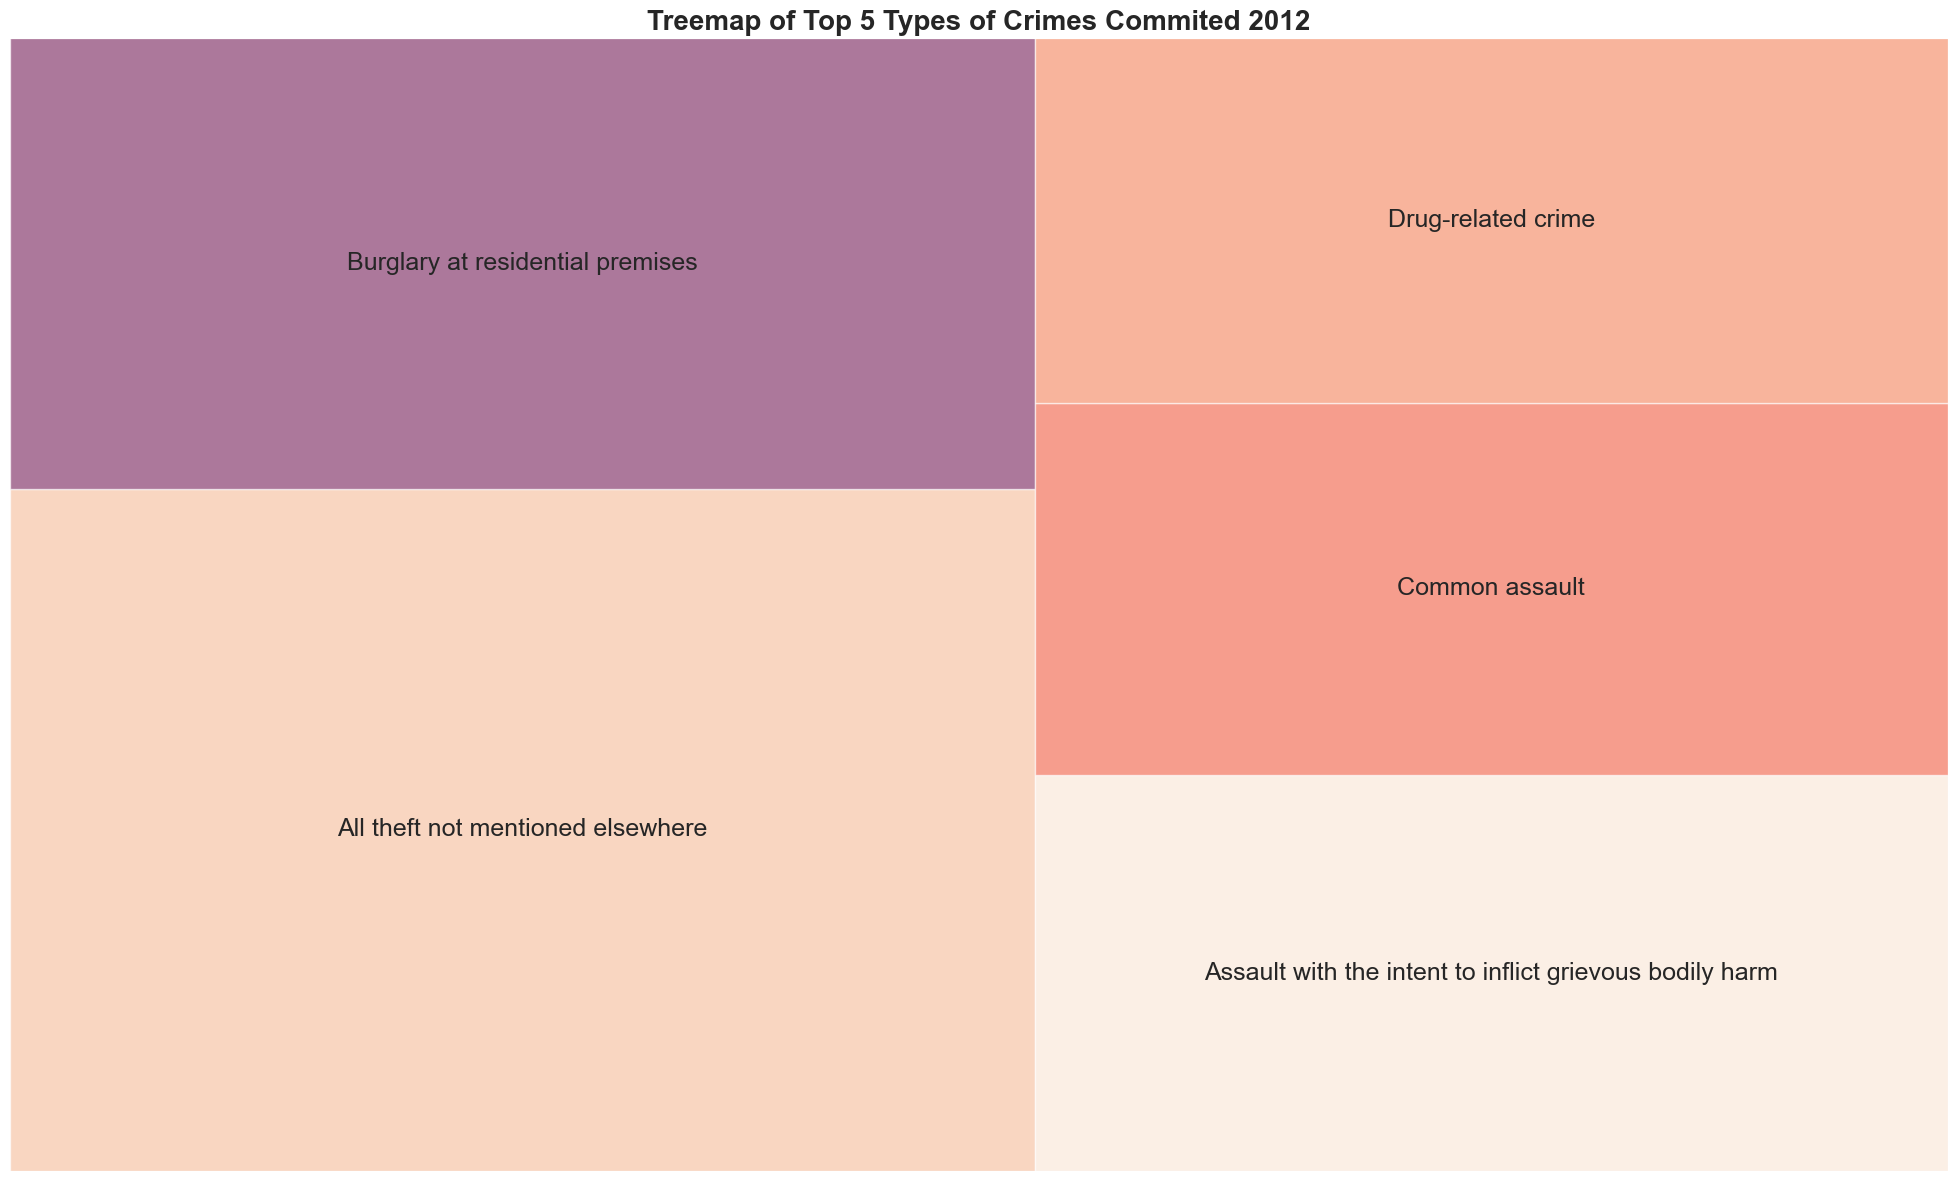

In [34]:
tree_map_for_crimes(yr_2012, category_list_2012, 'Treemap of Top 5 Types of Crimes Commited 2012')

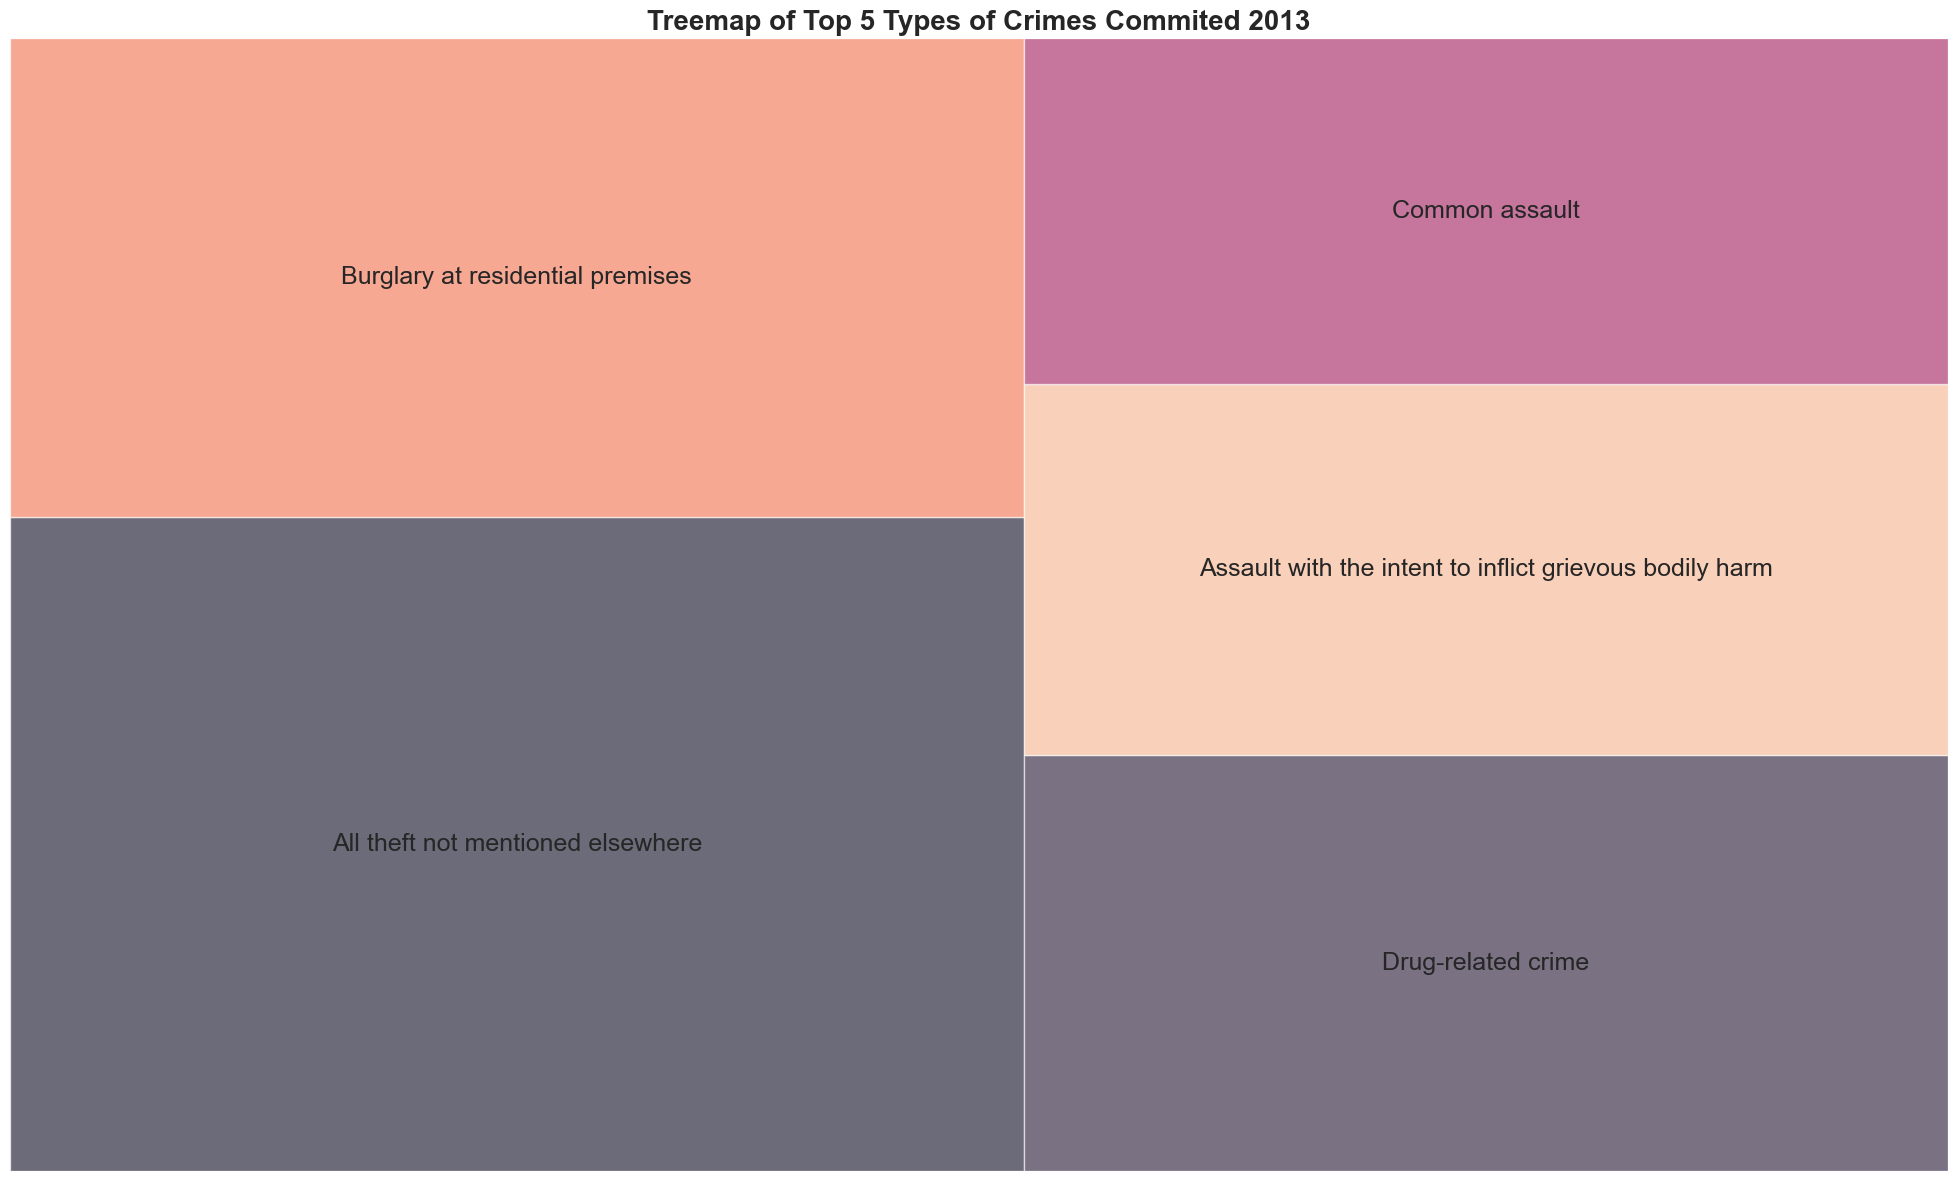

In [35]:
tree_map_for_crimes(yr_2013, category_list_2013, 'Treemap of Top 5 Types of Crimes Commited 2013')

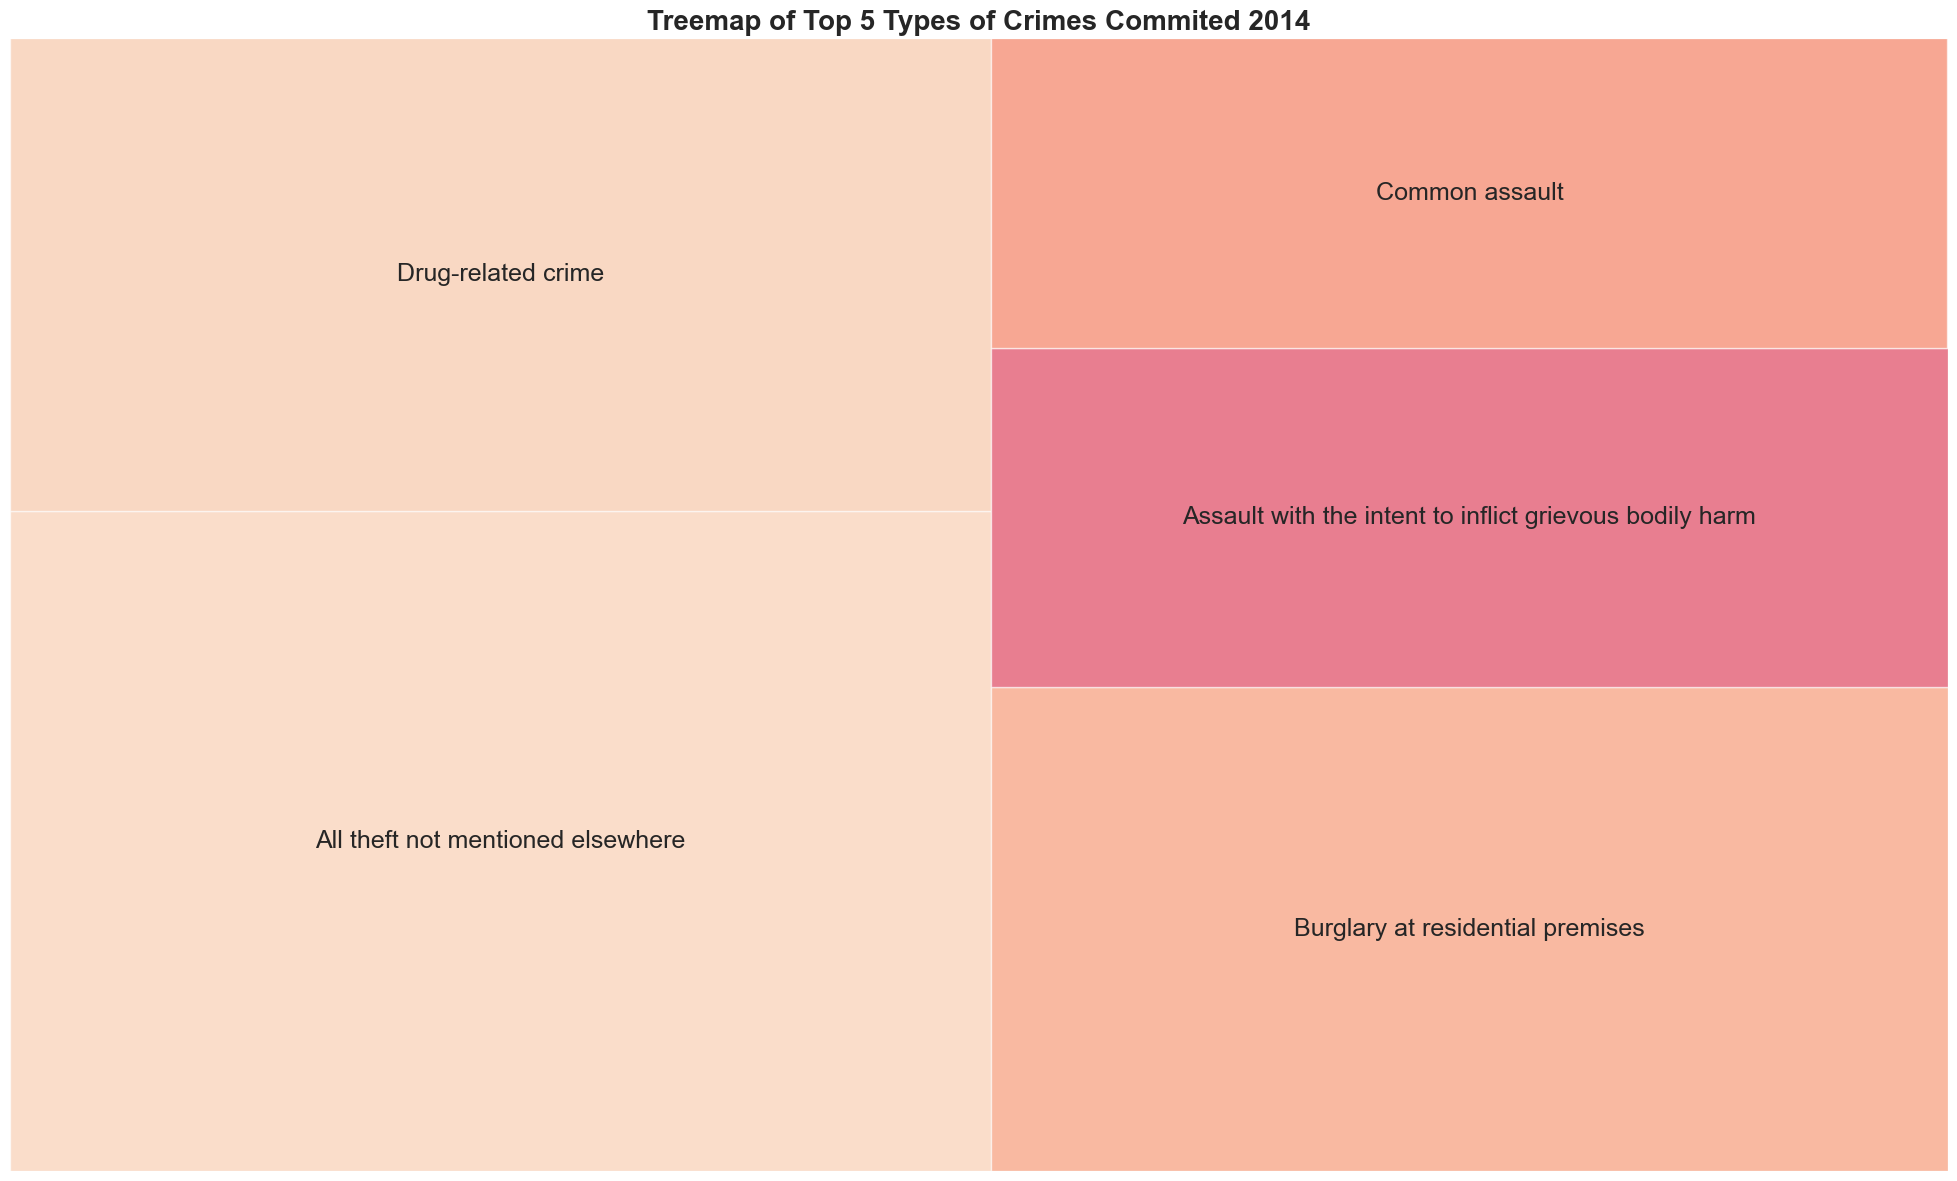

In [36]:
tree_map_for_crimes(yr_2014, category_list_2014, 'Treemap of Top 5 Types of Crimes Commited 2014')

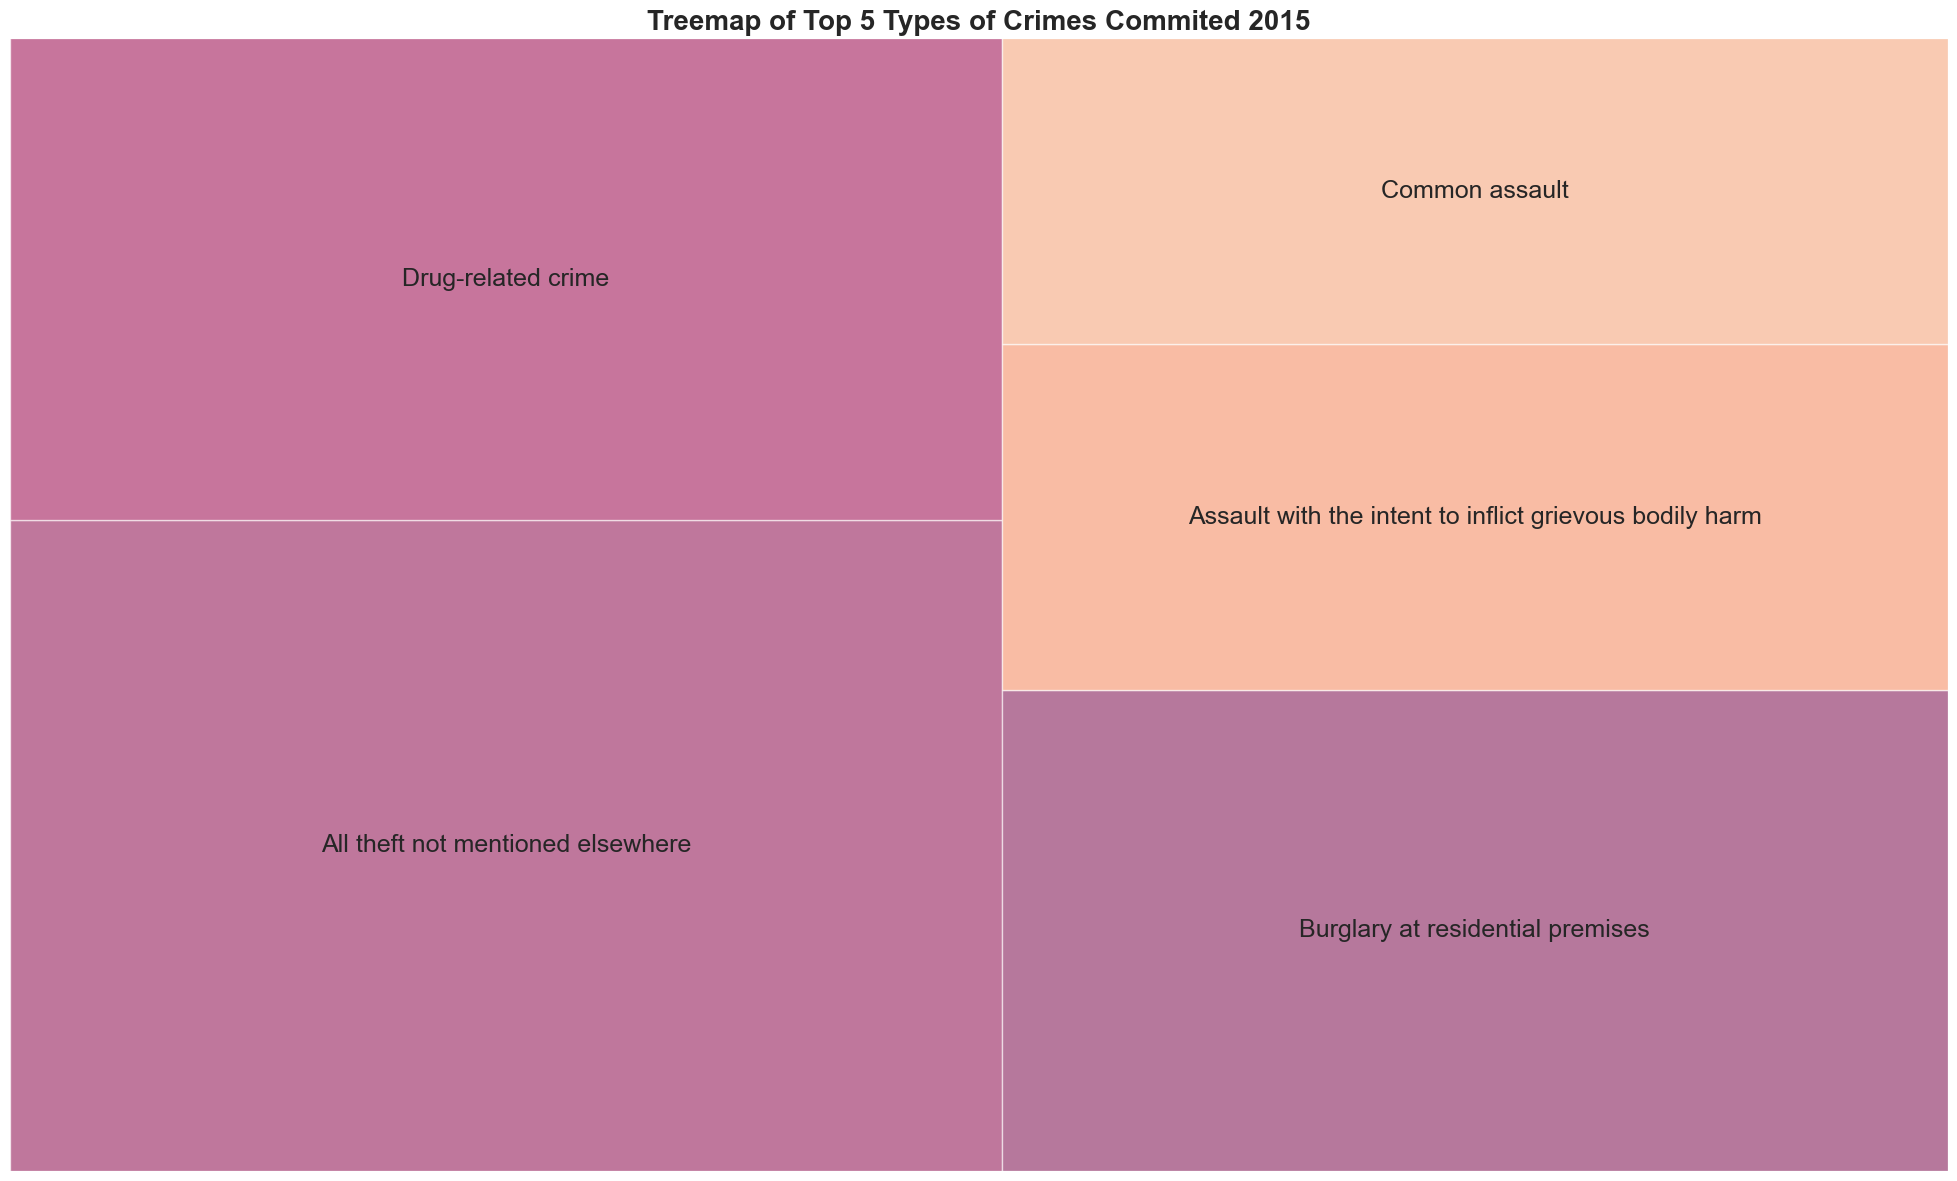

In [37]:
tree_map_for_crimes(yr_2015, category_list_2015, 'Treemap of Top 5 Types of Crimes Commited 2015')

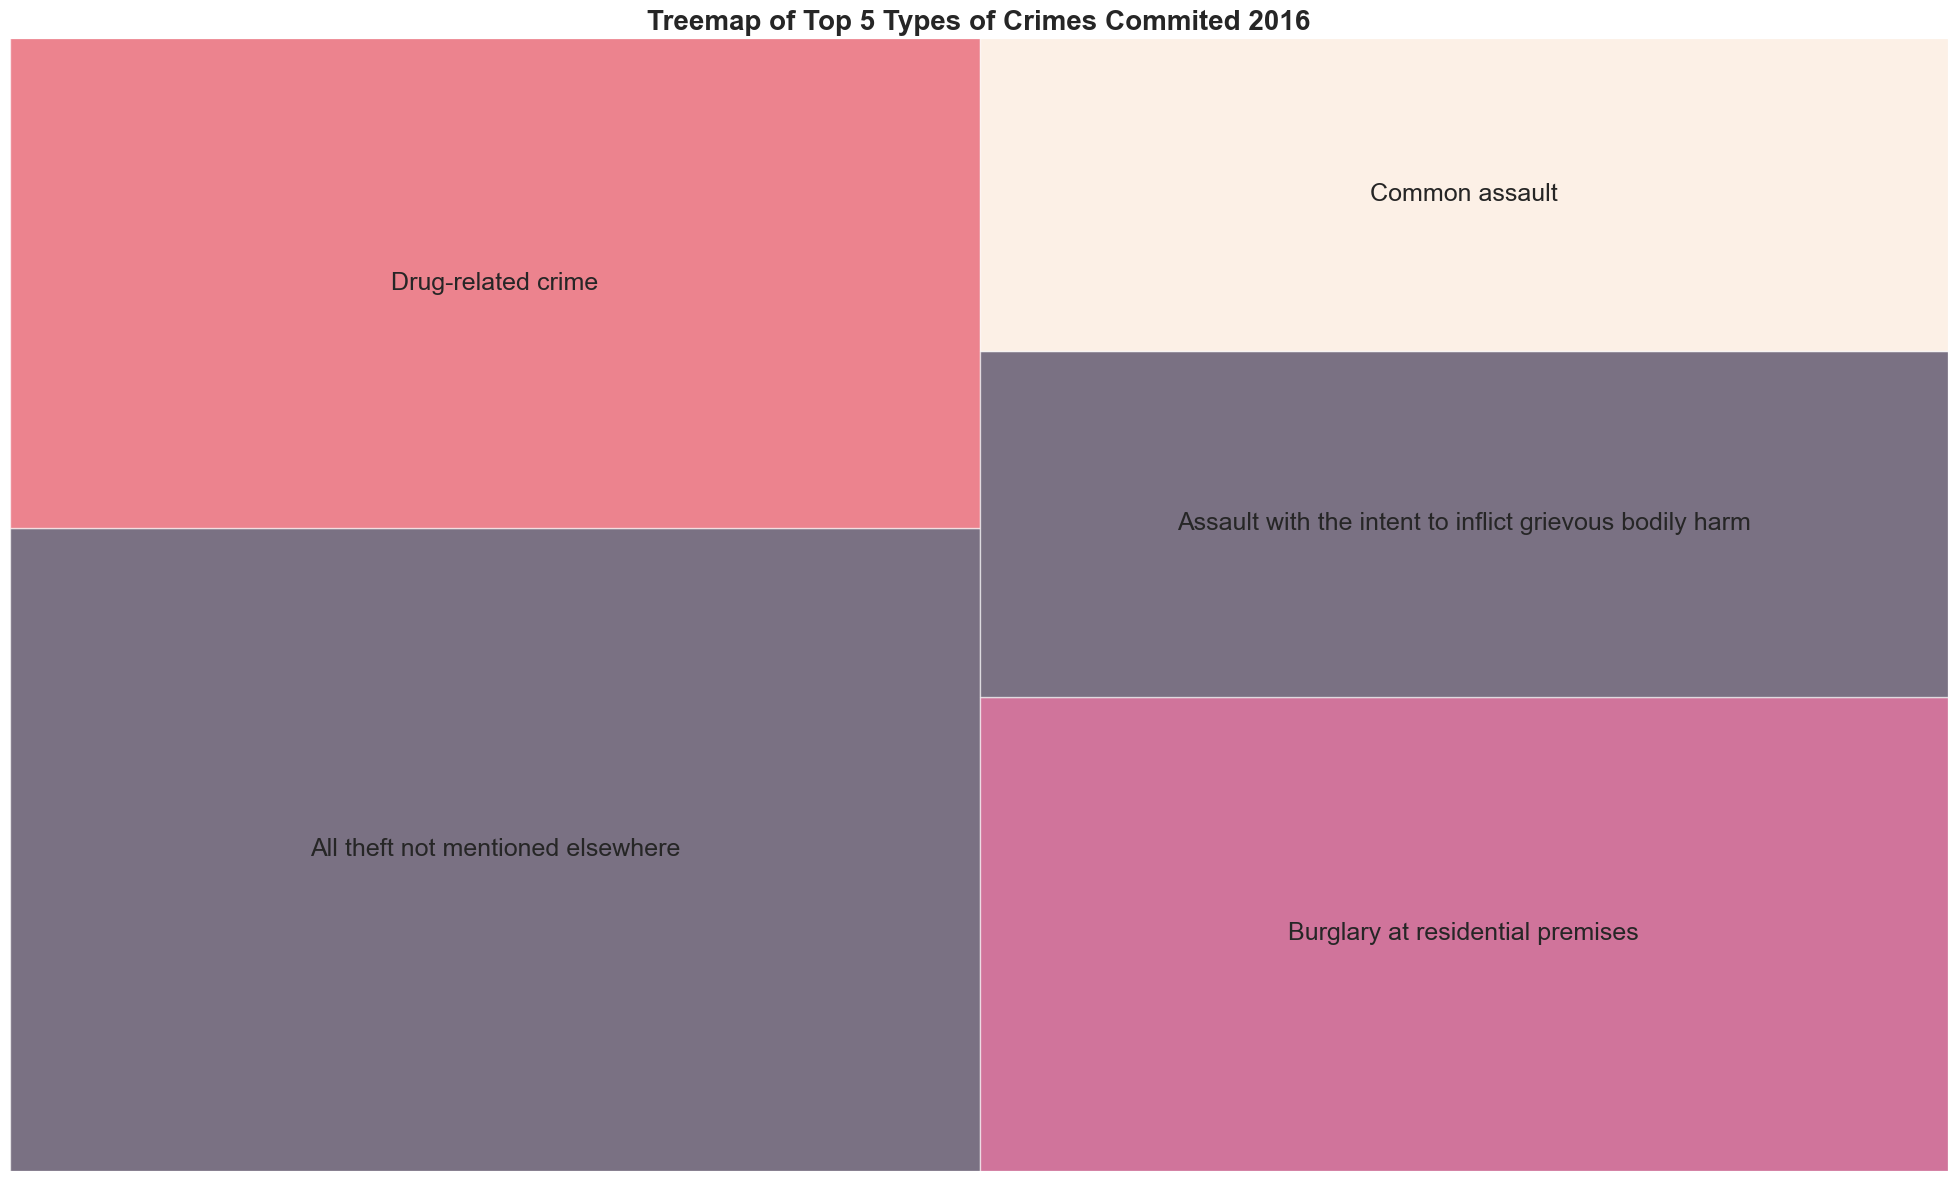

In [38]:
tree_map_for_crimes(yr_2016, category_list_2016, 'Treemap of Top 5 Types of Crimes Commited 2016')

From the tree maps above over the 10 years it seems like the most common crimes are ranging from assualt, burglary and drug related crimes. So law enforcement needs to strategise on how to mitigate these common crimes.

In [39]:
df_crime_stats_grouped_category_a = df_crime_stats_grouped_category['2006'].sum()
df_crime_stats_grouped_category_a

2176557

# Regression

In [40]:
#Converting the Unemployment rate and Crime DataFrames to numpy arrays
np_unemployment = df_crime_unemployment['Unemployment Rate'].to_numpy()
np_crime = df_crime_unemployment['Recorded Crimes'].to_numpy()

In [41]:
x1 = np_unemployment.reshape((-1,1))
y = np_crime

In [42]:
model = LinearRegression()

In [43]:
model.fit(x1, y)

LinearRegression()

In [44]:
model = LinearRegression().fit(x1, y)

In [45]:
r_sq = model.score(x1, y)
print('coefficient of determination:', format(r_sq, '%'))

coefficient of determination: 32.804013%


# Comments

The coefficient of determination highlights how much of the independent variable influences the dependent variable.


From the result above 32,8% of unemployment explains the crime statistics in South Africa. 


This is a weak relationship, and there must be other variables which should be considered that can help explain the rising crime in South Africa.